In [3]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns



International Football results from 1872 to today dataset
https://www.kaggle.com/datasets/patateriedata/all-international-football-results

In [4]:
df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')

C:\Users\dukec\AppData\Local\Temp\ipykernel_1068\107228863.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')


In [5]:
df.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
5,2018,06.01.2018,Selva Costera (CHI),50km,22,6:25:01 h,NaN,ARG,1974.0,M,M40,7.792,5
6,2018,06.01.2018,Selva Costera (CHI),50km,22,6:28:00 h,Los Patagones,ARG,1979.0,F,W35,7.732,6
7,2018,06.01.2018,Selva Costera (CHI),50km,22,6:32:24 h,Reaktiva Chile,CHI,1967.0,F,W50,7.645,7
8,2018,06.01.2018,Selva Costera (CHI),50km,22,6:39:08 h,Puro Trail Osorno,CHI,1985.0,M,M23,7.516,8
9,2018,06.01.2018,Selva Costera (CHI),50km,22,6:45:11 h,Marlene Flores Team,CHI,1976.0,M,M40,7.404,9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7461195 entries, 0 to 7461194
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete club               object 
 7   Athlete country            object 
 8   Athlete year of birth      float64
 9   Athlete gender             object 
 10  Athlete age category       object 
 11  Athlete average speed      object 
 12  Athlete ID                 int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 740.0+ MB


## **Cleaning**

In [8]:
# Only USA, 50k or 50 Mi, 2020
df2 = df[(df['Event distance/length'].isin(['50km', '50mi'])) & (df['Year of event'] == 2020) & (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA')
  ]

In [9]:

df2.shape

(26090, 13)

In [10]:
df2['Event name'].str.split('(').str.get(0)

2539945    West Seattle Beach Run - Winter Edition 
2539946    West Seattle Beach Run - Winter Edition 
2539947    West Seattle Beach Run - Winter Edition 
2539948    West Seattle Beach Run - Winter Edition 
2539949    West Seattle Beach Run - Winter Edition 
                             ...                   
2760957     Yankee Springs Fall Trail Run Festival 
2760958     Yankee Springs Fall Trail Run Festival 
2760959     Yankee Springs Fall Trail Run Festival 
2760960     Yankee Springs Fall Trail Run Festival 
2760961     Yankee Springs Fall Trail Run Festival 
Name: Event name, Length: 26090, dtype: object

In [11]:
df2['Event name'] = df2['Event name'].str.split('(').str.get(0)

C:\Users\dukec\AppData\Local\Temp\ipykernel_1068\3473829760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event name'] = df2['Event name'].str.split('(').str.get(0)


In [12]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281


In [13]:
df2['athlete_age'] = 2020 - df2['Athlete year of birth']

C:\Users\dukec\AppData\Local\Temp\ipykernel_1068\3897931444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['athlete_age'] = 2020 - df2['Athlete year of birth']


In [14]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0


In [15]:
df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)

C:\Users\dukec\AppData\Local\Temp\ipykernel_1068\2477507555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Athlete performance'] = df2['Athlete performance'].str.split(' ').str.get(0)


In [16]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0


In [23]:
#Drop unnecessary columns:
df2 = df2.drop(['Athlete club','Athlete year of birth', 'Athlete age category'], axis=1)


KeyError: "['Athlete club', 'Athlete year of birth', 'Athlete age category'] not found in axis"

In [29]:
df2 = df2.drop(['Athlete country'], axis = 1)

In [25]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,USA,M,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,USA,M,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,USA,M,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,USA,M,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,USA,M,11.212,810281,43.0


In [26]:
#Drop null values
df2.isna().sum()

Year of event                0
Event dates                  0
Event name                   0
Event distance/length        0
Event number of finishers    0
Athlete performance          0
Athlete country              0
Athlete gender               0
Athlete average speed        0
Athlete ID                   0
athlete_age                  0
dtype: int64

In [21]:
df2 = df2.dropna()

In [31]:
df2.shape

(25857, 10)

In [30]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0


In [32]:
df2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
athlete_age                  float64
dtype: object

In [33]:
df2['athlete_age'] = df2['athlete_age'].astype(int)

In [35]:
df2['Athlete average speed'] = df2['Athlete average speed'].astype(float)

In [36]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43


In [ ]:
# Year of event                  int64
# Event dates                   object
# Event name                    object
# Event distance/length         object
# Event number of finishers      int64
# Athlete performance           object
# Athlete gender                object
# Athlete average speed         object
# Athlete ID                     int64
# athlete_age                  float64
# dtype: object

In [37]:
df2 = df2.rename(columns = {
    'Year of event' : 'year',
    'Event dates' : 'race_day',
    'Event name' :'race_name',
    'Event distance/length' : 'race_length',
    'Event number of finishers' : 'race_number_of_finishers',
    'Athlete performance' : 'athlete_performace',
    'Athlete gender' : 'athlete_gender',
    'Athlete average speed' : 'athelte_average_speed',
    'Athlete ID' : 'athlete_id'
    
})

In [48]:
df2.head()

,year,race_day,race_name,race_length,race_number_of_finishers,athlete_performace,athlete_gender,athlete_average_speed,athlete_id,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43


In [47]:
df2 = df2.rename(columns= {'athelte_performace' : 'athlete_performance'})

In [49]:
df3 = df2[['race_day', 'race_name', 'race_length', 'race_number_of_finishers', 'athlete_id', 'athlete_gender', 'athlete_age', 'athlete_performace', 'athlete_average_speed', 'year']]

In [50]:
df3.head()

,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performace,athlete_average_speed,year
2539945,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,71287,M,29,3:17:55,15.158,2020
2539946,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,629508,M,39,4:02:32,12.369,2020
2539947,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,64838,M,21,4:07:57,12.099,2020
2539948,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,704450,M,37,4:22:02,11.449,2020
2539949,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,810281,M,43,4:27:34,11.212,2020


<Axes: xlabel='race_length', ylabel='Count'>

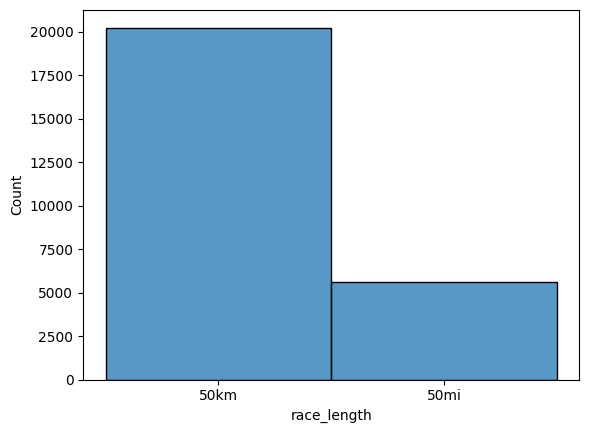

In [51]:
sns.histplot(df3['race_length'])

<Axes: xlabel='race_length', ylabel='Count'>

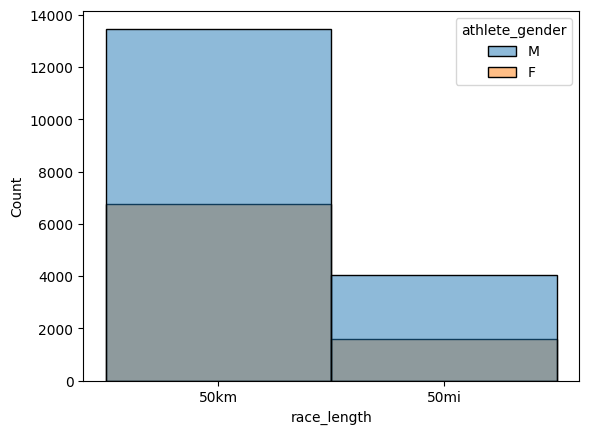

In [53]:
sns.histplot(df3, x='race_length', hue ='athlete_gender')

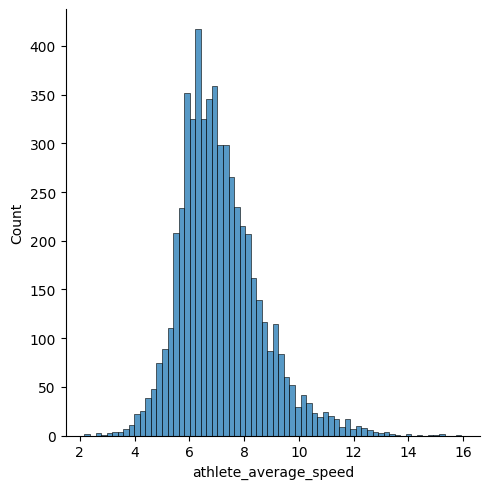

In [54]:
sns.displot(df3[df3['race_length'] == '50mi']['athlete_average_speed'])

<Axes: xlabel='race_length', ylabel='athlete_average_speed'>

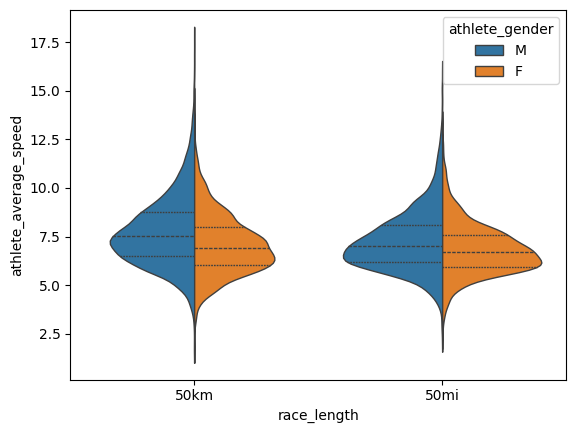

In [57]:
sns.violinplot(data = df3, x='race_length', y='athlete_average_speed', hue= 'athlete_gender', split= True, inner = 'quart', linewidth=1)

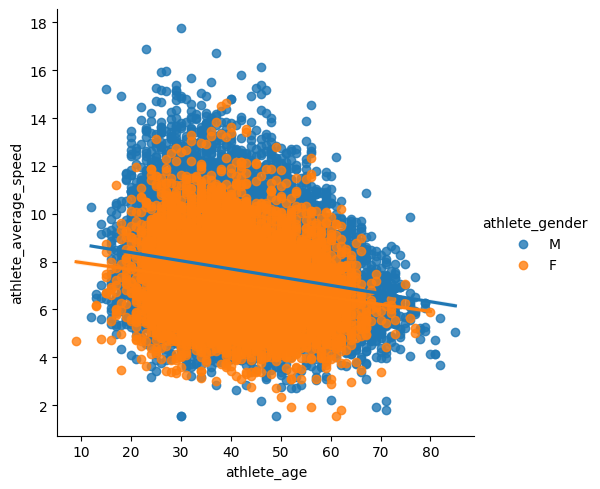

In [60]:
sns.lmplot(data  = df3, x= 'athlete_age', y = 'athlete_average_speed', hue= 'athlete_gender')

# Analysis

In [61]:
df3.groupby(['race_length', 'athlete_gender'])['athlete_average_speed'].mean()

race_length  athlete_gender
50km         F                 7.083011
             M                 7.738985
50mi         F                 6.834371
             M                 7.257633
Name: athlete_average_speed, dtype: float64

In [62]:
df3.query('race_length == "50mi"').groupby('athlete_age')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending= False).query('count > 19')

,mean,count
athlete_age,,
29,7.902252,135
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.540923,91
31,7.451638,138
38,7.430022,231
35,7.422359,195
36,7.403854,185


In [64]:
df3.query('race_length == "50mi"').groupby('athlete_age')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending= True).query('count > 9')

,mean,count
athlete_age,,
70,5.470667,12
65,5.934786,14
68,5.957500,10
67,6.114909,11
66,6.194300,10
60,6.261788,33
62,6.272730,37
61,6.358355,31
63,6.514806,31


In [65]:
df3['race_month'] = df3['race_day'].str.split('.').str.get(1).astype(int)

C:\Users\dukec\AppData\Local\Temp\ipykernel_1068\3078284804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['race_month'] = df3['race_day'].str.split('.').str.get(1).astype(int)


In [66]:
df3.head()

,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performace,athlete_average_speed,year,race_month
2539945,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,71287,M,29,3:17:55,15.158,2020,2
2539946,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,629508,M,39,4:02:32,12.369,2020,2
2539947,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,64838,M,21,4:07:57,12.099,2020,2
2539948,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,704450,M,37,4:22:02,11.449,2020,2
2539949,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,810281,M,43,4:27:34,11.212,2020,2


In [67]:
df3['race_season'] = df3['race_month'].apply(lambda x: 'Winter' if x >11 else 'Fall' if x > 8 else 'Summer' if x > 5 else 'Spring' if x >2 else 'Winter')

C:\Users\dukec\AppData\Local\Temp\ipykernel_1068\1122584475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['race_season'] = df3['race_month'].apply(lambda x: 'Winter' if x >11 else 'Fall' if x > 8 else 'Summer' if x > 5 else 'Spring' if x >2 else 'Winter')


In [68]:
df3.head()

,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performace,athlete_average_speed,year,race_month,race_season
2539945,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,71287,M,29,3:17:55,15.158,2020,2,Winter
2539946,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,629508,M,39,4:02:32,12.369,2020,2,Winter
2539947,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,64838,M,21,4:07:57,12.099,2020,2,Winter
2539948,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,704450,M,37,4:22:02,11.449,2020,2,Winter
2539949,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,810281,M,43,4:27:34,11.212,2020,2,Winter


In [71]:
df3.groupby('race_season')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending = False)

,mean,count
race_season,,
Spring,7.684430,3294
Winter,7.518187,11595
Fall,7.406619,8315
Summer,6.869336,2653


In [72]:
df3.query('race_length == "50mi"').groupby('race_season')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending = False)

,mean,count
race_season,,
Fall,7.511585,1997
Spring,7.082557,836
Winter,7.048442,1977
Summer,6.505776,817
